In [1]:
import pandas as pd 
import numpy as np
import panel as pn
import holoviews as hv
import matplotlib.pyplot as plt
from holoviews import opts
pn.extension('tabulator')
hv.extension('bokeh')
import hvplot.pandas
%matplotlib inline


In [2]:
df =pd.read_csv('dataset/reported_hospital_capacity_admissions_facility_level_weekly_average_timeseries_20210103.csv')
df

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_30-39_7_day_sum,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum
0,df2363988746840134806aa7b2accf9c89259601776986...,2020-12-25,PR,NaN,Hospital San Antonio,"#18 Norte, Calle Dr",Mayagüez,680.0,Short Term,NaN,...,-999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,0.0
1,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2020-12-25,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,452193,2020-12-25,TX,452193,El Paso LTAC Hospital,NaN,NaN,79902.0,Long Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-12-25,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9922a3f069ff4686fe467885206fb1172f609233cfe517...,2020-12-25,PR,NaN,Centro Medico Correccional de Bayamon,NaN,NaN,960.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106954,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,72141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,NaN
106955,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,72145.0,...,4.0,20.0,9.0,12.0,9.0,10.0,0.0,4.0,170.0,NaN
106956,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,72153.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,274.0,NaN
106957,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,78010.0,...,0.0,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,193.0,NaN


In [3]:
import great_expectations as ge
ge_df = ge.from_pandas(df)
ge_df.expect_table_row_count_to_equal(106959)
ge_df.expect_column_values_to_not_be_null("state")
ge_df.expect_column_values_to_not_be_null("collection_week")


{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true,
  "result": {
    "element_count": 106959,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  }
}

In [4]:
df.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_beds_7_day_avg',
       'all_adult_hospital_beds_7_day_avg',
       'all_adult_hospital_inpatient_beds_7_day_avg',
       'inpatient_beds_used_7_day_avg',
       'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
       'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg',
       'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'staffed_adult_icu_bed_occupancy_7_day_avg',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
       'staffed_icu_adult_p

In [5]:
hospital_utilization = df.loc[:,['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'total_beds_7_day_avg', 'all_adult_hospital_beds_7_day_avg',
        'all_adult_hospital_inpatient_bed_occupied_7_day_coverage',  'inpatient_beds_used_7_day_sum','inpatient_beds_7_day_avg', 
        'inpatient_beds_used_7_day_avg','staffed_adult_icu_bed_occupancy_7_day_avg','total_beds_7_day_coverage','all_adult_hospital_beds_7_day_coverage', 
        'total_beds_7_day_sum', 'all_adult_hospital_beds_7_day_sum', 'inpatient_beds_7_day_coverage', 'total_icu_beds_7_day_coverage',
       'all_adult_hospital_inpatient_beds_7_day_sum', 'inpatient_beds_used_7_day_coverage','icu_beds_used_7_day_coverage']]
hospital_utilization

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,total_beds_7_day_avg,...,staffed_adult_icu_bed_occupancy_7_day_avg,total_beds_7_day_coverage,all_adult_hospital_beds_7_day_coverage,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,inpatient_beds_7_day_coverage,total_icu_beds_7_day_coverage,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_coverage,icu_beds_used_7_day_coverage
0,df2363988746840134806aa7b2accf9c89259601776986...,2020-12-25,PR,NaN,Hospital San Antonio,"#18 Norte, Calle Dr",Mayagüez,680.0,Short Term,75.0,...,-999999.0,7,7,525.0,298.0,7,7,298.0,7,7
1,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2020-12-25,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,0.0,...,0.0,7,7,0.0,0.0,7,7,0.0,7,7
2,452193,2020-12-25,TX,452193,El Paso LTAC Hospital,NaN,NaN,79902.0,Long Term,28.0,...,0.0,6,6,168.0,168.0,6,6,168.0,6,6
3,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-12-25,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,10.0,...,0.0,7,7,70.0,70.0,7,7,70.0,7,7
4,9922a3f069ff4686fe467885206fb1172f609233cfe517...,2020-12-25,PR,NaN,Centro Medico Correccional de Bayamon,NaN,NaN,960.0,Short Term,96.0,...,0.0,7,7,672.0,609.0,7,7,609.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106954,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,59.4,...,0.0,7,7,416.0,379.0,7,7,311.0,7,7
106955,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,163.0,...,5.6,7,7,1141.0,1018.0,7,7,963.0,7,7
106956,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,57.9,...,10.0,7,7,405.0,386.0,7,7,304.0,7,7
106957,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,94.0,...,5.1,7,7,658.0,602.0,7,7,336.0,7,7


In [6]:
hospital_utilization.fillna(0)

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,total_beds_7_day_avg,...,staffed_adult_icu_bed_occupancy_7_day_avg,total_beds_7_day_coverage,all_adult_hospital_beds_7_day_coverage,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,inpatient_beds_7_day_coverage,total_icu_beds_7_day_coverage,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_coverage,icu_beds_used_7_day_coverage
0,df2363988746840134806aa7b2accf9c89259601776986...,2020-12-25,PR,0,Hospital San Antonio,"#18 Norte, Calle Dr",Mayagüez,680.0,Short Term,75.0,...,-999999.0,7,7,525.0,298.0,7,7,298.0,7,7
1,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2020-12-25,LA,0,Surgery Center of Zachary,0,0,70791.0,Short Term,0.0,...,0.0,7,7,0.0,0.0,7,7,0.0,7,7
2,452193,2020-12-25,TX,452193,El Paso LTAC Hospital,0,0,79902.0,Long Term,28.0,...,0.0,6,6,168.0,168.0,6,6,168.0,6,6
3,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-12-25,LA,0,Crescent City Surgical Centre,0,0,70118.0,Short Term,10.0,...,0.0,7,7,70.0,70.0,7,7,70.0,7,7
4,9922a3f069ff4686fe467885206fb1172f609233cfe517...,2020-12-25,PR,0,Centro Medico Correccional de Bayamon,0,0,960.0,Short Term,96.0,...,0.0,7,7,672.0,609.0,7,7,609.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106954,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,59.4,...,0.0,7,7,416.0,379.0,7,7,311.0,7,7
106955,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,163.0,...,5.6,7,7,1141.0,1018.0,7,7,963.0,7,7
106956,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,57.9,...,10.0,7,7,405.0,386.0,7,7,304.0,7,7
106957,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,94.0,...,5.1,7,7,658.0,602.0,7,7,336.0,7,7


In [7]:
# Compute the sum of several columns in the hospital_utilization dataframe
hospital_utilization['hospital_occupation'] = (
    hospital_utilization['total_beds_7_day_coverage'] +  
    hospital_utilization['inpatient_beds_7_day_coverage'] + 
    hospital_utilization['all_adult_hospital_beds_7_day_coverage'] + 
    hospital_utilization['total_icu_beds_7_day_coverage'] + 
    hospital_utilization['all_adult_hospital_inpatient_bed_occupied_7_day_coverage']
)

# Display the resulting dataframe
hospital_utilization






,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,total_beds_7_day_avg,...,total_beds_7_day_coverage,all_adult_hospital_beds_7_day_coverage,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,inpatient_beds_7_day_coverage,total_icu_beds_7_day_coverage,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_coverage,icu_beds_used_7_day_coverage,hospital_occupation
0,df2363988746840134806aa7b2accf9c89259601776986...,2020-12-25,PR,NaN,Hospital San Antonio,"#18 Norte, Calle Dr",Mayagüez,680.0,Short Term,75.0,...,7,7,525.0,298.0,7,7,298.0,7,7,35
1,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2020-12-25,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,0.0,...,7,7,0.0,0.0,7,7,0.0,7,7,35
2,452193,2020-12-25,TX,452193,El Paso LTAC Hospital,NaN,NaN,79902.0,Long Term,28.0,...,6,6,168.0,168.0,6,6,168.0,6,6,30
3,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-12-25,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,10.0,...,7,7,70.0,70.0,7,7,70.0,7,7,35
4,9922a3f069ff4686fe467885206fb1172f609233cfe517...,2020-12-25,PR,NaN,Centro Medico Correccional de Bayamon,NaN,NaN,960.0,Short Term,96.0,...,7,7,672.0,609.0,7,7,609.0,7,7,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106954,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,59.4,...,7,7,416.0,379.0,7,7,311.0,7,7,35
106955,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,163.0,...,7,7,1141.0,1018.0,7,7,963.0,7,7,35
106956,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,57.9,...,7,7,405.0,386.0,7,7,304.0,7,7,35
106957,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,94.0,...,7,7,658.0,602.0,7,7,336.0,7,7,35


In [8]:
idf =hospital_utilization.interactive()

In [9]:

# define a function to filter the DataFrame by state
def filter_by_state(state):
    return df[hospital_utilization['state'] == state]

# create an interactive panel slider
state_slider = pn.widgets.IntSlider(start=0, end=len(hospital_utilization['state'].unique())-1, step=1, value=0, name='state')
@pn.depends(state_slider.param.value)
def update(state_index):
    state = hospital_utilization['state'].unique()[state_index]
    return filter_by_state(state)

# display the panel
state_slider

IntSlider(end=54, name='state')

In [10]:
yaxis_hospital= pn.widgets.RadioButtonGroup(
    name ='y_axis',
    options = ['total_beds_7_day_avg','hospital_occupation'],
    button_type = 'success',
    
    
)

In [11]:
 states = hospital_utilization['state']
hospital_utilization_pipeline = (
    idf[
        (idf.index <= state_slider) &
        (idf.state.isin(states))
    ]
   .groupby(['total_beds_7_day_sum','total_beds_7_day_coverage',])[yaxis_hospital].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='total_beds_7_day_sum')
    .reset_index(drop=True)
)

In [12]:
hospital_utilization_pipeline

In [14]:
hospital_utilization_plot = hospital_utilization_pipeline.hvplot(x='total_beds_7_day_coverage', y = yaxis_hospital, line_width =2, title = 'hospital_facility_utilization')
hospital_utilization_plot

In [15]:
hospital_utilization_table = hospital_utilization_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
hospital_utilization_table

In [16]:
hospital_utilization_per_state_pipeline = (
       idf[
        (idf.index <= state_slider) &
        (idf.state.isin(states))
    ]
   .groupby(['total_beds_7_day_coverage', 'hospital_occupation'])[yaxis_hospital].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='total_beds_7_day_coverage')
    .reset_index(drop=True)
)
hospital_utilization_per_state_pipeline

In [18]:
hospital_utilization_per_state_pipeline_scatter_plot = hospital_utilization_per_state_pipeline.hvplot(x = 'total_beds_7_day_avg', y ='hospital_occupation',
                                                                                                      by ='total_beds_7_day_coverage', size =80,kind = "scatter", 
                                                                                                      alpha =0.7,height =500,width =500)
hospital_utilization_per_state_pipeline_scatter_plot

In [20]:
y_axis_utilization_coverage =pn.widgets.RadioButtonGroup(
      name = 'y_axis',
    options = ['total_beds_7_day_avg','total_beds_7_day_coverage'],
    button_type = 'success'
 )
states = hospital_utilization['state']
state_utilization_pipeline =(
      
    idf[
        (idf.index <= state_slider) &
        (idf.state.isin(states))
    ]
   .groupby(['total_beds_7_day_coverage', 'total_beds_7_day_sum'])[yaxis_hospital].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='total_beds_7_day_sum')
    .reset_index(drop=True)
)

state_utilization_pipeline

In [21]:
state_utilization_bar_chart = state_utilization_pipeline.hvplot(kind = 'bar', x = 'total_beds_7_day_sum',
                                                                y = y_axis_utilization_coverage ,title = 'number_of_avg_bed_coverage_per_county')
state_utilization_bar_chart

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [1371222172976] Row
        [0] Column(margin=(0, 25, 0, 25))
            [0] RadioButtonGroup(button_type='success', name='y_axis', options=['total_beds_7_day_avg', ...], value='total_beds_7_day_avg')
            [1] ParamFunction(function, _pane=HoloViews, width=700)
            [2] ParamFunction(function, _pane=Tabulator, width=500)
        [1] Row
            [0] Column(margin=(0, 25, 0, 25), width=600)
                [0] ParamFunction(function, _pane=HoloViews, width=600)
                [1] ParamFunction(function, _pane=HoloViews, width=600)
                [2] RadioButtonGroup(button_type='success', name='y_axis', options=['total_beds_7_day_avg', ...], value='total_beds_7_day_avg')
    [1370997974848] Markdown(str)
    [1371221540624] Markdown(str)
    [1371221539472] PNG(str, sizing_mode='scale_both')
    [1371221540048] Markdown(str)
    [1370579803712] IntSlider(end=54, name='state', value=34)
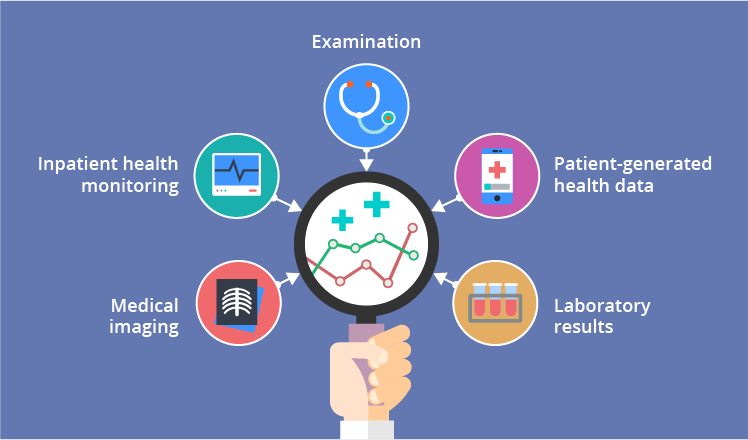

In [43]:
import panel as pn
pn.extension()

# Create necessary components
title = "Big Data Analytic System For Patient Management|Patient DashBoard|  BlissGVS Bondo | Mothly Report"
sidebar = [
    pn.pane.Markdown("## Big Data Analysis For Patient Management in Kenya"),
    pn.pane.Markdown("## This is  A big data analytic system for patient management in kenya, it takes into consideration the bliss Gvs facility for data analysis and visualization. Thanks to the management of Bliss Gvs countrywide we are able to model and visualize hospital facility utilization and resultant process improvement"),
    pn.pane.PNG('pub_med.png' ,sizing_mode='scale_both'),
    pn.pane.Markdown("## Settings"),
     state_slider
]
main = [
    pn.Row(
        pn.Column(
            yaxis_hospital,
            hospital_utilization_plot.panel(width=700),
            hospital_utilization_table.panel(width=500),
            margin=(0, 25, 0, 25)
        ),
        pn.Row(
        pn.Column(
            hospital_utilization_per_state_pipeline_scatter_plot.panel(width=600),
            state_utilization_bar_chart.panel(width=600),
            y_axis_utilization_coverage,
            margin=(0, 25, 0, 25),
            width=600
        )
    ),
    ),
    
]

# Create the template
template = pn.template.FastListTemplate(
    title= title,
    sidebar=sidebar,
    main=main,
    accent_base_color="#88d8b0",
    header_background="#88d8b0"
)

# Serve the template
template.servable()